# Computational Social Science Project #3 

**Enter your Name: Saada Amadu

*Semester:* Fall 2024

## 1. Introduction

### Load data 

In [1]:
#
# load libraries
# -----------
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelBinarizer

# There are a few warnings that will appear that will not affect your analysis. Run this code to ignore. 
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

# Make sure to import other libraries that will be necessary for training models!

In [2]:
#
# read in "Inspections Data 2011-2013" csv data
# -----------
chicago_inspections_2011_to_2013 = pd.read_csv("data/Chicago Inspections 2011-2013.csv", 
                                              low_memory=False)

#
# read in  "Inspections Data 2014_updated" csv data
# -----------
chicago_inspections_2014 = pd.read_csv("data/Chicago Inspections 2014_updated.csv",  # be sure to use the "updated" data here
                                      low_memory=False)

In [3]:
# look at the inspections data
chicago_inspections_2011_to_2013.head(10)

,Inspection_ID,Inspection_Date,DBA_Name,AKA_Name,License,Facility_Type,Risk,Address,City,State,Zip,Inspection_Type,Results,Latitude,Longitude,Location,Facility_Type_Clean,criticalCount,seriousCount,minorCount,pass_flag,fail_flag,pastFail,pastCritical,pastSerious,pastMinor,timeSinceLast,firstRecord,ID,LICENSE_ID,ACCOUNT_NUMBER,LEGAL_NAME,DOING_BUSINESS_AS_NAME,ADDRESS,CITY,STATE,ZIP_CODE,WARD,PRECINCT,WARD_PRECINCT,POLICE_DISTRICT,LICENSE_CODE,LICENSE_DESCRIPTION,BUSINESS_ACTIVITY_ID,BUSINESS_ACTIVITY,LICENSE_NUMBER,APPLICATION_TYPE,LICENSE_TERM_START_DATE,LICENSE_TERM_EXPIRATION_DATE,LICENSE_STATUS,LATITUDE,LONGITUDE,minDate,maxDate,ageAtInspection,consumption_on_premises_incidental_activity,tobacco,package_goods,outdoor_patio,public_place_of_amusement,limited_business_license,childrens_services_facility_license,tavern,regulated_business_license,filling_station,caterers_liquor_license,mobile_food_license,precipIntensity,temperatureMax,windSpeed,humidity,heat_burglary,heat_garbage,heat_sanitation,criticalFound
0,269961,2013-01-31,SEVEN STAR,SEVEN STAR,30790,Grocery Store,Risk 3 (Low),3352 N BROADWAY,CHICAGO,IL,60657.0,Canvass,Pass,41.943359,-87.644999,"(41.943359344775146, -87.64499875300952)",Other,0,0,2,1,0,0,0,0,0,2.0,1,30790-20110416,2081412.0,63759.0,VIRGINIA DELA ROSA,SEVEN STAR,3352 N BROADWAY 1,CHICAGO,IL,60657.0,44.0,33.0,44-33,19.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,30790.0,RENEW,2011-04-16,2013-04-15,AAI,41.943359,-87.644999,2002-02-16,2015-04-15,10.964384,0,1,0,0,0,1,0,0,0,0,0,0,0.014587,53.496667,13.340000,0.900000,26.992376,12.768572,37.748787,0
1,507211,2011-10-18,PANERA BREAD,PANERA BREAD,1475890,Restaurant,Risk 1 (High),6059 N LINCOLN AVE,CHICAGO,IL,60659.0,Canvass,Pass,41.991919,-87.709631,"(41.99191947239194, -87.70963133440333)",Restaurant,0,0,3,1,0,0,0,0,0,2.0,1,1475890-20110416,2081695.0,207283.0,"PANERA, LLC",PANERA BREAD,6059 N LINCOLN AVE C,CHICAGO,IL,60659.0,50.0,23.0,50-23,24.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1475890.0,RENEW,2011-04-16,2013-04-15,AAI,41.991919,-87.709631,2004-05-05,2019-04-15,7.457534,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,13.976557,12.895485,15.412267,0
2,507212,2011-10-18,LITTLE QUIAPO RESTAURANT,LITTLE QUIAPO RESTAURANT,1740130,Restaurant,Risk 1 (High),6259 N MCCORMICK RD,CHICAGO,IL,60659.0,Canvass,Fail,41.995632,-87.712707,"(41.99563177556418, -87.71270678169132)",Restaurant,0,2,6,0,1,0,0,0,0,2.0,1,1740130-20110216,2070145.0,3107.0,ENELITA GARCIA,LITTLE QUIAPO RESTAURANT,6259 N MCCORMICK RD,CHICAGO,IL,60659.0,50.0,25.0,50-25,17.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1740130.0,RENEW,2011-02-16,2013-02-15,AAI,41.995632,-87.712707,2007-03-22,2017-02-15,4.578082,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,12.611239,8.004220,8.320330,0
3,507216,2011-10-19,SERGIO'S TAQUERIA PIZZA INC.,SERGIO'S TAQUERIA PIZZA,1447363,Restaurant,Risk 1 (High),3253 W BRYN MAWR AVE,CHICAGO,IL,60659.0,Canvass,Pass,41.982933,-87.710982,"(41.982933189164974, -87.71098225381141)",Restaurant,0,0,6,1,0,0,0,0,0,2.0,1,1447363-20110216,2071895.0,270993.0,SERGIO'S TAZUERIA PIZZA INC.,SERGIO'S TAQUERIA PIZZA INC.,3253 W BRYN MAWR AVE,CHICAGO,IL,60659.0,39.0,48.0,39-48,17.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1447363.0,RENEW,2011-02-16,2013-02-15,AAI,41.982933,-87.710982,2003-12-31,2019-02-15,7.805479,0,0,0,0,0,0,0,0,0,0,0,0,0.002737,56.153333,10.863333,0.616667,35.906383,26.238645,38.186618,0
4,507219,2011-10-20,TARGET STORE # T-2079,TARGET,1679459,Restaurant,Risk 2 (Medium),2112 W PETERSON AVE,CHICAGO,IL,60659.0,Canvass,Fail,41.990729,-87.682979,"(41.99072921796059, -87.68297945359863)",Restaurant,0,2,6,0,1,0,0,0,0,2.0,1,1679459-20100216,2009972.0,15538.0,TARGET CORPORATION,TARGET STORE # T-2079,2112 W PETERSON AVE,CHICAGO,IL,60659.0,40.0,18.0,40-18,24.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1679459.0,RENEW,

In [4]:
# list column names
chicago_inspections_2011_to_2013.columns

Index(['Inspection_ID', 'Inspection_Date', 'DBA_Name', 'AKA_Name', 'License',
       'Facility_Type', 'Risk', 'Address', 'City', 'State', 'Zip',
       'Inspection_Type', 'Results', 'Latitude', 'Longitude', 'Location',
       'Facility_Type_Clean', 'criticalCount', 'seriousCount', 'minorCount',
       'pass_flag', 'fail_flag', 'pastFail', 'pastCritical', 'pastSerious',
       'pastMinor', 'timeSinceLast', 'firstRecord', 'ID', 'LICENSE_ID',
       'ACCOUNT_NUMBER', 'LEGAL_NAME', 'DOING_BUSINESS_AS_NAME', 'ADDRESS',
       'CITY', 'STATE', 'ZIP_CODE', 'WARD', 'PRECINCT', 'WARD_PRECINCT',
       'POLICE_DISTRICT', 'LICENSE_CODE', 'LICENSE_DESCRIPTION',
       'BUSINESS_ACTIVITY_ID', 'BUSINESS_ACTIVITY', 'LICENSE_NUMBER',
       'APPLICATION_TYPE', 'LICENSE_TERM_START_DATE',
       'LICENSE_TERM_EXPIRATION_DATE', 'LICENSE_STATUS', 'LATITUDE',
       'LONGITUDE', 'minDate', 'maxDate', 'ageAtInspection',
       'consumption_on_premises_incidental_activity', 'tobacco',
       'package_goods',

In [5]:
# drop column names related to geography, identification, and pass/fail flags that perfectly predict the outcome
chicago_inspections_2011_to_2013.drop(columns = ['AKA_Name', 
                                                 'License',
                                                 'Address',
                                                 'City',
                                                 'State',
                                                 'Zip',
                                                 'Latitude',
                                                 'Longitude',
                                                 'Location',
                                                 'ID',
                                                 'LICENSE_ID',
                                                 'LICENSE_TERM_START_DATE',
                                                 'LICENSE_TERM_EXPIRATION_DATE',
                                                 'LICENSE_STATUS',
                                                 'ACCOUNT_NUMBER',
                                                 'LEGAL_NAME',
                                                 'DOING_BUSINESS_AS_NAME',
                                                 'ADDRESS',
                                                 'CITY',
                                                 'STATE',
                                                 'ZIP_CODE',
                                                 'WARD',
                                                 'PRECINCT',
                                                 'LICENSE_CODE',
                                                 'BUSINESS_ACTIVITY_ID',
                                                 'BUSINESS_ACTIVITY',
                                                 'LICENSE_NUMBER',
                                                 'LATITUDE',
                                                 'LONGITUDE',
                                                 'pass_flag',
                                                 'fail_flag'],
                                     inplace = True)

# set index
chicago_inspections_2011_to_2013.set_index(['Inspection_ID', 'DBA_Name'], inplace = True)

In [6]:
# convert the inspection date to a datetime format
chicago_inspections_2011_to_2013['Inspection_Date'] = pd.to_datetime(chicago_inspections_2011_to_2013['Inspection_Date'])

In [7]:
# list column names
chicago_inspections_2011_to_2013.columns

Index(['Inspection_Date', 'Facility_Type', 'Risk', 'Inspection_Type',
       'Results', 'Facility_Type_Clean', 'criticalCount', 'seriousCount',
       'minorCount', 'pastFail', 'pastCritical', 'pastSerious', 'pastMinor',
       'timeSinceLast', 'firstRecord', 'WARD_PRECINCT', 'POLICE_DISTRICT',
       'LICENSE_DESCRIPTION', 'APPLICATION_TYPE', 'minDate', 'maxDate',
       'ageAtInspection', 'consumption_on_premises_incidental_activity',
       'tobacco', 'package_goods', 'outdoor_patio',
       'public_place_of_amusement', 'limited_business_license',
       'childrens_services_facility_license', 'tavern',
       'regulated_business_license', 'filling_station',
       'caterers_liquor_license', 'mobile_food_license', 'precipIntensity',
       'temperatureMax', 'windSpeed', 'humidity', 'heat_burglary',
       'heat_garbage', 'heat_sanitation', 'criticalFound'],
      dtype='object')

### Visualization

Let's visualize what inspections look like over time.

<Axes: title={'center': 'Inspections by Month and Year'}, xlabel='Inspection_MonthYear'>

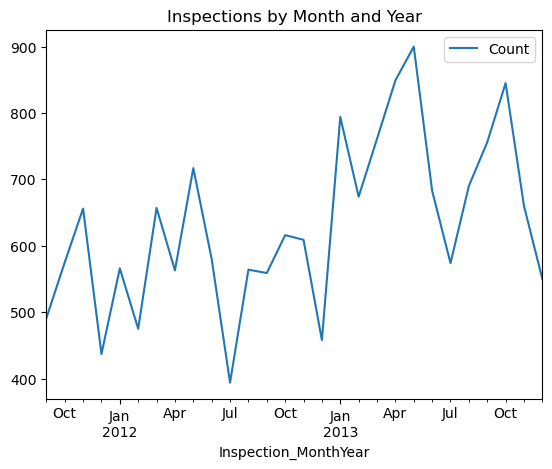

In [8]:
# visualize inspections over time
# -----------
chicago_inspections_2011_to_2013['Inspection_MonthYear'] = chicago_inspections_2011_to_2013['Inspection_Date'].dt.to_period('M')
counts_by_day = chicago_inspections_2011_to_2013.groupby('Inspection_MonthYear').count().rename(columns = {'Facility_Type': 'Count'})['Count'].reset_index()
counts_by_day.set_index(["Inspection_MonthYear"], inplace = True)
counts_by_day.plot(title = "Inspections by Month and Year") 

Let's visualize what the distribution of results looks like.

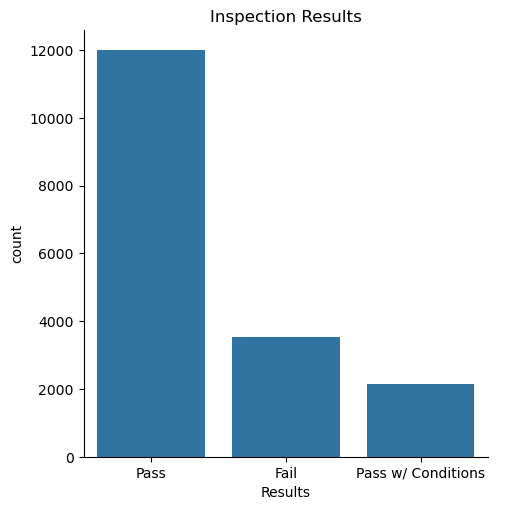

In [9]:
# view inspection results
# -----------
sns.catplot(data = chicago_inspections_2011_to_2013,
           x = "Results",
           kind = "count")

plt.title("Inspection Results")
plt.show()

What if we separate results by facility type?

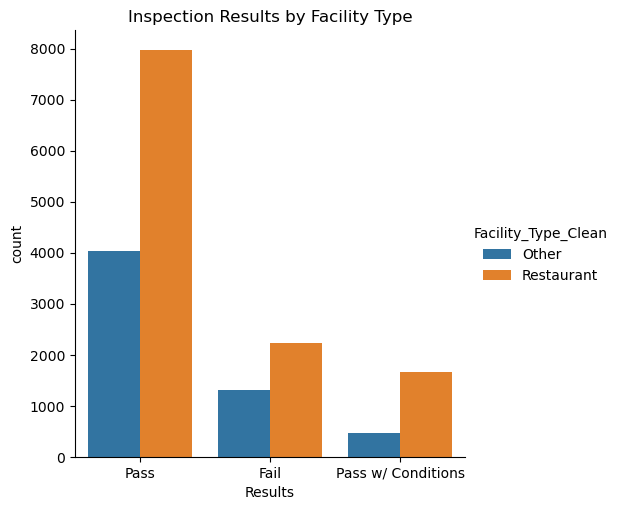

In [10]:
# view inspection results by facility type (restaurant or not)
# -----------
sns.catplot(data = chicago_inspections_2011_to_2013,
            x = "Results",
            kind = "count",
            hue = 'Facility_Type_Clean')

plt.title("Inspection Results by Facility Type")
plt.show();

## 2. Data Preprocessing and Cleaning

In [11]:
# drop datetime info
# -----------
chicago_inspections_2011_to_2013 = chicago_inspections_2011_to_2013.dropna().drop(['Inspection_Date',
                                                                                   'minDate',
                                                                                   'maxDate',
                                                                                   'Inspection_MonthYear'],
                                                                                  axis = 1)

In [12]:
# process target 
# -----------
y = chicago_inspections_2011_to_2013['Results']

# decide if you want to binarize the outcome variable 
# -----------
# comment out the following lines of code if you don't want to binarize the target variable
y = y.replace({'Pass w/ Conditions': 'Pass'})
lb_style = LabelBinarizer()
y = lb_style.fit_transform(y)

# recode 0s and 1s so 1s are "Fail"
y = np.where(y == 1, 0 ,1)


# process features
# -----------

# create feature dataset
X = chicago_inspections_2011_to_2013.drop(columns = ['Results', 
                                                     'Facility_Type', 
                                                     'LICENSE_DESCRIPTION', 
                                                     'WARD_PRECINCT'])


# get dummies
X = pd.get_dummies(X)

In [13]:
# view feature datset
X.head()

,,criticalCount,seriousCount,minorCount,pastFail,pastCritical,pastSerious,pastMinor,timeSinceLast,firstRecord,POLICE_DISTRICT,ageAtInspection,consumption_on_premises_incidental_activity,tobacco,package_goods,outdoor_patio,public_place_of_amusement,limited_business_license,childrens_services_facility_license,tavern,regulated_business_license,filling_station,caterers_liquor_license,mobile_food_license,precipIntensity,temperatureMax,windSpeed,humidity,heat_burglary,heat_garbage,heat_sanitation,criticalFound,Risk_Risk 1 (High),Risk_Risk 2 (Medium),Risk_Risk 3 (Low),Inspection_Type_Canvass,Facility_Type_Clean_Other,Facility_Type_Clean_Restaurant,APPLICATION_TYPE_C_EXPA,APPLICATION_TYPE_C_LOC,APPLICATION_TYPE_ISSUE,APPLICATION_TYPE_RENEW
Inspection_ID,DBA_Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
269961,SEVEN STAR,0,0,2,0,0,0,0,2.0,1,19.0,10.964384,0,1,0,0,0,1,0,0,0,0,0,0,0.014587,53.496667,13.340000,0.900000,26.992376,12.768572,37.748787,0,False,False,True,True,True,False,False,False,False,True
507211,PANERA BREAD,0,0,3,0,0,0,0,2.0,1,24.0,7.457534,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,13.976557,12.895485,15.412267,0,True,False,False,True,False,True,False,False,False,True
507212,LITTLE QUIAPO RESTAURANT,0,2,6,0,0,0,0,2.0,1,17.0,4.578082,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,12.611239,8.004220,8.320330,0,True,False,False,True,False,True,False,False,False,True
507216,SERGIO'S TAQUERIA PIZZA INC.,0,0,6,0,0,0,0,2.0,1,17.0,7.805479,0,0,0,0,0,0,0,0,0,0,0,0,0.002737,56.153333,10.863333,0.616667,35.906383,26.238645,38.186618,0,True,False,False,True,False,True,False,False,False,True
507219,TARGET STORE # T-2079,0,2,6,0,0,0,0,2.0,1,24.0,5.290411,0,0,1,0,0,1,0,0,0,0,0,0,0.009987,52.730000,16.266667,0.690000,9.530785,3.401567,2.126788,0,False,True,False,True,False,True,False,False,False,True


## 3. Fit Models

Now choose 3 different machine learning techniques and apply them below. Choose from one of the algorithms we have used in lab (e.g., logistic regression, random forests, `AdaBoost()`, `xgboost()`, `VotingClassifer()`, or `BART`). 

Detail the basic logic and assumptions underlying each model, its pros/cons, and why it is a plausible choice for this problem. Also, be sure to do the following:

1. Import the appropriate library from sklearn
2. Set up a hyperparameter grid (check out our previous labs to see how to do this)
3. Find the best hyperparameters, and then fit your model (using either train/validation splits or cross-validation)

In [14]:
# Set seed
from sklearn.model_selection import train_test_split
np.random.seed(10)

# Training and test split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    train_size=0.80, 
                                                    test_size=0.20, 
                                                    stratify=y)

# Training and validation split
X_train, X_validate, y_train, y_validate = train_test_split(X_train, 
                                                            y_train, 
                                                            train_size=0.75, 
                                                            test_size=0.25, 
                                                            stratify=y_train)

### LogisticRegression

# Logistic regression is a linear model that predicts probabilities for binary or multi-class classification problems. The observations are independent of each other and there is minimal multicollinearity among predictors. It is simple to implement and interpret and it provides probability estimates, which are useful for threshold-based classification. However, it struggles with non-linear relationships unless features are transformed. But it is a good baseline model to benchmark performance before moving to more complex models.

In [15]:
# load libraries

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

logit_model = LogisticRegression()

# set parameteters
param_grid = {'penalty': ['l1', 'l2', 'elasticnet'],
             'C': np.arange(.1, 1, .1),
             'fit_intercept': [True, False],
             'solver': ['liblinear', 'saga']}

# execute the grid search and fit to training data
logit_grid = GridSearchCV(logit_model, 
                          param_grid, 
                          cv=3)

logit_grid.fit(X_train, 
               y_train)

# choose best performing model
best_index = np.argmax(logit_grid.cv_results_["mean_test_score"])
best_logit_pred = logit_grid.best_estimator_.predict(X_validate)

# print results using validation set
print(logit_grid.cv_results_["params"][best_index])
print('Validation Accuracy', accuracy_score(best_logit_pred, y_validate))

/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
108 fits failed out of a total of 324.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
54 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py", line 1172, in fit
    solv

{'C': 0.1, 'fit_intercept': True, 'penalty': 'elasticnet', 'solver': 'liblinear'}
Validation Accuracy 0.9150881776616591


In [16]:
logit_model_ = logit_grid.best_estimator_

# extract the coefficients and create a DataFrame for plotting
coef_df = pd.concat(
    [pd.DataFrame(X_train.columns, columns=['Feature']),
     pd.DataFrame(logit_model_.coef_.transpose(), columns=['Coefficient'])],
    axis=1
)

# adding a column for absolute coefficient values
coef_df['abs_coef'] = abs(coef_df['Coefficient'])

# display the resulting DataFrame
print(coef_df)

                                        Feature  Coefficient  abs_coef
0                                 criticalCount     0.200049  0.200049
1                                  seriousCount     4.250774  4.250774
2                                    minorCount     0.042823  0.042823
3                                      pastFail     0.610566  0.610566
4                                  pastCritical     0.000000  0.000000
5                                   pastSerious    -0.218717  0.218717
6                                     pastMinor     0.051557  0.051557
7                                 timeSinceLast    -0.345468  0.345468
8                                   firstRecord     0.724550  0.724550
9                               POLICE_DISTRICT    -0.003094  0.003094
10                              ageAtInspection     0.030063  0.030063
11  consumption_on_premises_incidental_activity    -0.320256  0.320256
12                                      tobacco     0.000000  0.000000
13    

/var/folders/hw/_vg0xz2j4_lccf3f4z_wn1yc0000gn/T/ipykernel_48292/3310599253.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="abs_coef", y="Feature", data=top_features, palette="viridis")


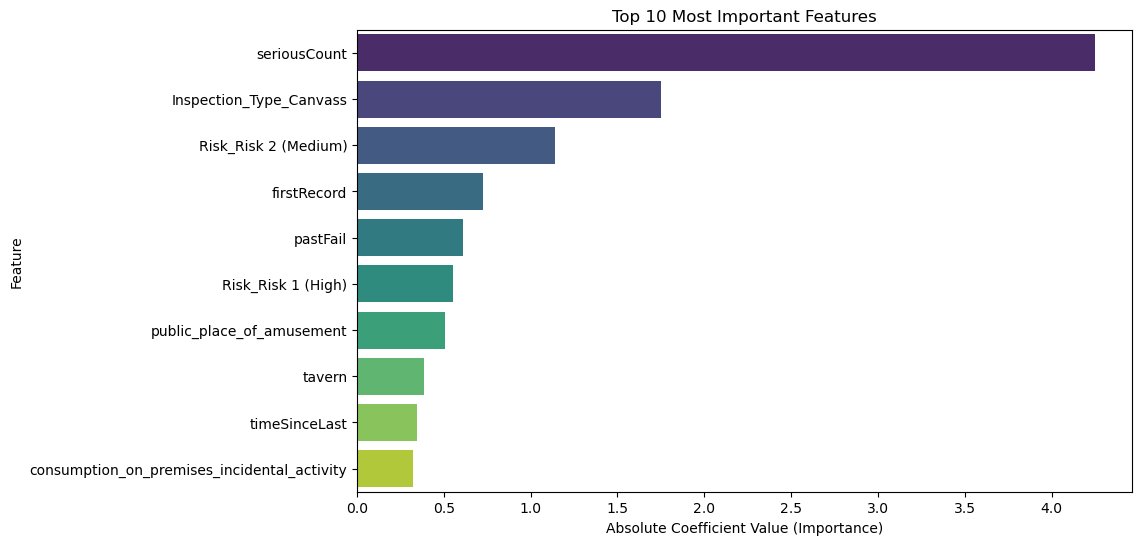

In [17]:
# Sort by absolute importance and take the top 10
top_features = coef_df.nlargest(10, 'abs_coef')

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x="abs_coef", y="Feature", data=top_features, palette="viridis")
plt.title("Top 10 Most Important Features")
plt.xlabel("Absolute Coefficient Value (Importance)")
plt.ylabel("Feature")
plt.show()

# Random Forests

# Random Forest is an ensemble learning method that uses multiple decision trees to make predictions. It works well with data where observations are independent and where features may have non-linear relationships. By combining predictions from multiple trees (using majority vote for classification), it reduces overfitting and improves generalization compared to individual decision trees. Random Forest is flexible, to missing data, and capable of identifying intricate patterns and interactions among features without requiring extensive preprocessing or transformations. However, it can sometimes be less straightforward to interpret than simpler models like logistic regression and may require thoughtful tuning of settings (such as the number of trees) to achieve optimal results. It is a valuable choice when working with datasets that include a wide variety of features and potential relationships. RandomForest if able to handle complex interactions among features such as the combination of "risk" and "facility type" may predict failure. It's able to handle missing information, incomplete establishment details, or noise in data.

# Note on parameter tuning

Tuning this random forest model takes a long time to run. Below you'll see my commented-out grid search for tuning this model's parameters. 

Rather than re-running this each time, I've taken the best parameters from one grid search and re-used them on an individuall-trained model in the cell below this one.

In [18]:
# import libraries


#import seaborn as sns
#from sklearn.ensemble import RandomForestClassifier
#from sklearn import tree


# settings
#%matplotlib inline
#sns.set_style("darkgrid")

#RandomForest = RandomForestClassifier(
#                                     n_estimators=100,              
#                                     max_depth=None,                # set how deep tree nodes can go
#                                     min_samples_split=2,           # samples (observations) needed to split node
#                                     max_features=None,             # number of features to look for when splitting
#                                     min_impurity_decrease=1e-07,   # early stopping
#                                     random_state = 10,
#                                     n_jobs=-1)  

# set parameteters

#param_grid = {'n_estimators': [100, 250, 1000, 1500, 2000],
#             'max_depth': [None, 5, 10],
#             'min_samples_split': [2, 5, 10, 20, 35],
#             'max_features': ['sqrt', 30],
#             'min_impurity_decrease': [0.0, 0.0001, 0.001, 0.1]}

# execute the grid search and fit to training data
#RandomForest_cv = GridSearchCV(RandomForest, 
#                        param_grid, 
#                         cv=3)

#RandomForest_cv.fit(X_train, 
#                    y_train)

# choose best performing model
#best_index = np.argmax(RandomForest_cv.cv_results_["mean_test_score"])
#best_rf_pred = logit_grid.best_estimator_.predict(X_validate)

# print results
#print(RandomForest_cv.cv_results_["params"][best_index])
#print('Validation Accuracy', accuracy_score(best_rf_pred, y_validate))

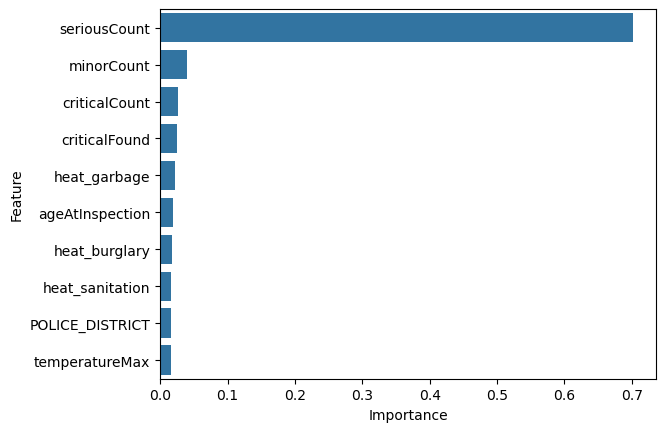

In [19]:
# fit the random forest on data to get feature importance

# import library
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier


RandomForest = RandomForestClassifier(
    max_depth=10,
    max_features='sqrt',
    min_impurity_decrease=0.0,
    min_samples_split=10,
    n_estimators=1500 
)

rf_classifier = RandomForest.fit(X_train, y_train.ravel())

# create feature importance dataframe
feat_importances = pd.concat([pd.DataFrame(X_train.columns),pd.DataFrame(np.transpose(rf_classifier.feature_importances_))], axis = 1)
feat_importances.columns = ["Feature", "Importance"]

# plot 
sns.barplot(x = "Importance", 
            y = "Feature", 
            data = feat_importances.nlargest(10, 'Importance')) # identify the 10 most important features
plt.show()

In [20]:
print(rf_classifier)

RandomForestClassifier(max_depth=10, min_samples_split=10, n_estimators=1500)


# XGBoost

# XGBoost is an advanced ensemble learning method based on gradient boosting that uses decision trees to make predictions. It is highly effective for datasets where observations are independent and where features may have non-linear relationships. By iteratively improving weak learners (trees) and focusing on minimizing errors in each step, XGBoost achieves high predictive accuracy and generalization. Similar to RandomForest, it handles noise effectively and can capture complex interactions among features without requiring extensive preprocessing or transformations. XGBoost also handles imbalanced data effectively and provides detailed feature importance metrics, aiding in interpretability and decision-making. Its efficiency, scalability, and flexibility make it ideal for prioritizing inspections and predicting failures accurately.

In [21]:
#execute the grid search and fit to training data

import xgboost as xgb

param_grid = {'max_depth': [4, 6, 8],
             'eta': [.1, .2, .3],
             'subsample': [0.25, 0.5, .75, 1.0],
             'colsample_bytree': [0.75, 1.0, 2, 3],
             'tree_method': ['hist'],
             'num_boost_round': [10, 15, 30]
              }


xgb_classifier = xgb.XGBClassifier(random_state=10, verbose_eval=True)

xgb_cv = GridSearchCV(xgb_classifier, 
                          param_grid, 
                          cv=3)

xgb_cv.fit(X_train,  y_train)

best_xgb_model = xgb_cv.best_estimator_

# choose best performing model and predict on validation set
best_index = np.argmax(xgb_cv.cv_results_["mean_test_score"])
best_xgb_pred = best_xgb_model.predict(X_validate)

# print results
print(xgb_cv.cv_results_["params"][best_index])
print('Validation Accuracy', accuracy_score(best_xgb_pred, y_validate))

/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
648 fits failed out of a total of 1296.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
324 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/xgboost/sklearn.py", line 1531, in fit
    self._Booster = train(
                    ^^^^^^
  File "/opt/ana

{'colsample_bytree': 2, 'eta': 0.1, 'max_depth': 4, 'num_boost_round': 10, 'subsample': 0.25, 'tree_method': 'hist'}
Validation Accuracy 0.9196603527106466


### Validation Metrics

Be sure to explain which of these metrics you would want to prioritize when conducting predictive auditing in this context and why.

**Hint**: Try writing a for loop to use [`cross_val_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) to check for accuracy, precision, recall and f1 across all of your models.

# For food safety inspections, recall might be the most critical metric because it ensures that the model identifies most fail cases (minimizing public health risks). Precision and F1 score can provide additional insights, especially if resources are limited for unnecessary inspections. Based on cross-validation results, RandomForest demonstrated the highest recall, which is the key metric for this context. By maximizing recall, the model ensures that the majority of unsafe establishments are flagged, reducing the likelihood of public health risks from undetected violations.

In [22]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification


# Initialize the model
best_models = [logit_model_, rf_classifier, best_xgb_model]

for model in best_models:
    # Evaluate using cross_val_score with different metrics
    scores_accuracy = cross_val_score(model, X_test, y_test, cv=5, scoring='accuracy')
    scores_f1 = cross_val_score(model, X_test, y_test, cv=5, scoring='f1')
    scores_recall = cross_val_score(model, X_test, y_test, cv=5, scoring='recall')
    scores_precision = cross_val_score(model, X_test, y_test, cv=5, scoring='precision')

    print(model)
    print(f"Accuracy: {scores_accuracy.mean():.3f}")
    print(f"F1 Score: {scores_f1.mean():.3f}")
    print(f"Precision: {scores_precision.mean():.3f}")
    print(f"Recall: {scores_recall.mean():.3f}")

LogisticRegression(C=0.5, penalty='l1', solver='liblinear')
Accuracy: 0.922
F1 Score: 0.814
Precision: 0.784
Recall: 0.848
RandomForestClassifier(max_depth=10, min_samples_split=10, n_estimators=1500)
Accuracy: 0.927
F1 Score: 0.832
Precision: 0.777
Recall: 0.885
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.1, eval_metric=None,
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_boost_round=10, .

## 4. Policy Simulation

### Interpretable Machine Learning

Use tools like coefficient plots or feature importance plots to investigate your models. Which features contribute to your predictions? Are there any additional features you wish you could incorporate that you don't have available in this analysis?

**Hint**: Use tools like feature importance plots and coefficient plots.

# seriousCount is the feature that most impacts predictions across Logistic Regression, Random Forest, and XGBoost. With Logistic Regression, firstRecord and pastFail also significantly influence whether an establishment passes or fails inspection. Additionally, certain variables, such as inspection type canvass, risk level 2, risk level 1, and tavern, decrease the likelihood of failure. Features like minorCount, criticalFound, and criticalCount from Random Forest, and minorCount and risk level 3 from XGBoost, also have a non-negligible impact on predictions.

# Without a data dictionary, it is difficult to accurately interpret the meaning of these features. For example, I infer that seriousCount relates to establishments with a high number of previous violations, though it is unclear how this differs from pastFail, which seems to indicate that the model predicts inspection failure for establishments with a history of failing inspections. It would also be useful to understand the roles of features such as heat, wind, and police district in food establishment inspections. Additionally, I wonder if variables like employee training on sanitary conditions and the rate of employee turnover might also influence predictions.

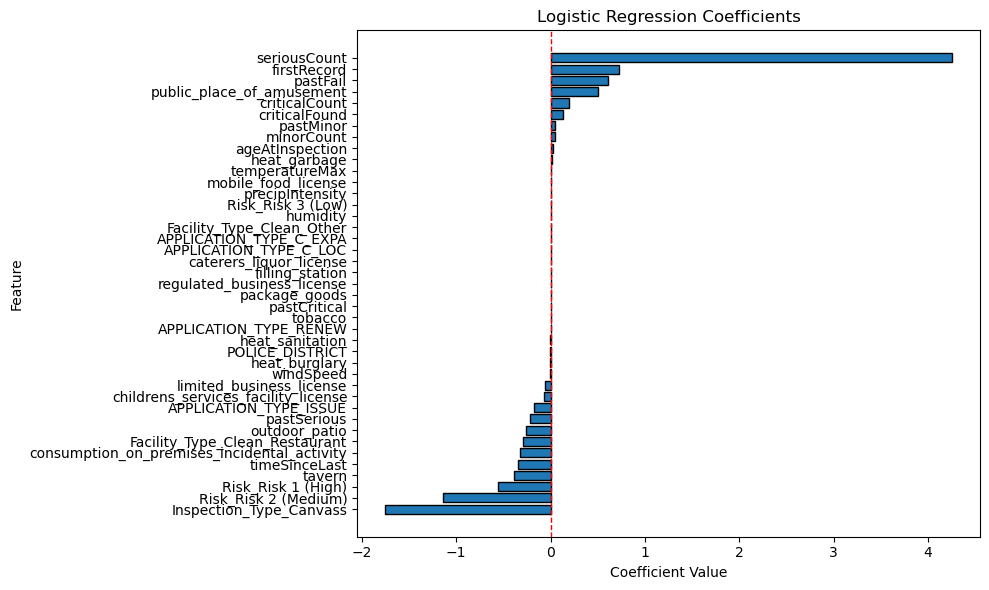

In [23]:
# Extract coefficients and feature names
coefficients = logit_model_.coef_.flatten()
feature_names = X.columns

# Create a DataFrame for visualization
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort coefficients by magnitude
coef_df = coef_df.sort_values(by='Coefficient', ascending=False)

# Plot coefficients
plt.figure(figsize=(10, 6))
plt.barh(coef_df['Feature'], coef_df['Coefficient'], edgecolor='black')
plt.axvline(0, color='red', linestyle='--', linewidth=1)
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Logistic Regression Coefficients')
plt.gca().invert_yaxis()  # Reverse order for readability
plt.tight_layout()
plt.show()

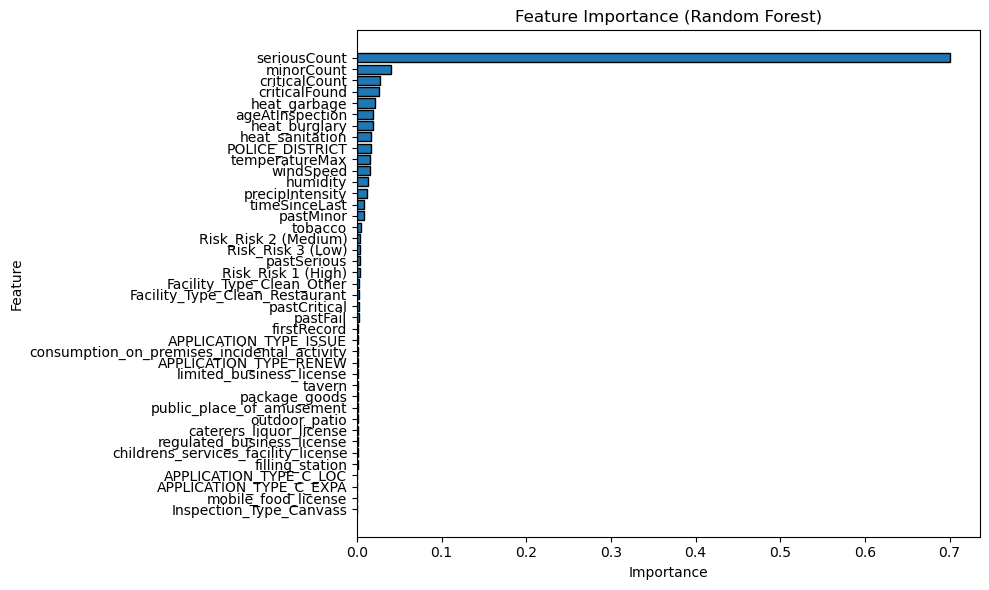

In [24]:
# Extract feature importance
feature_importance = rf_classifier.feature_importances_

# Create a DataFrame for visualization
feature_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})

# Sort by importance
feature_df = feature_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_df['Feature'], feature_df['Importance'], edgecolor='black')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance (Random Forest)')
plt.gca().invert_yaxis()  # Reverse order for readability
plt.tight_layout()
plt.show()

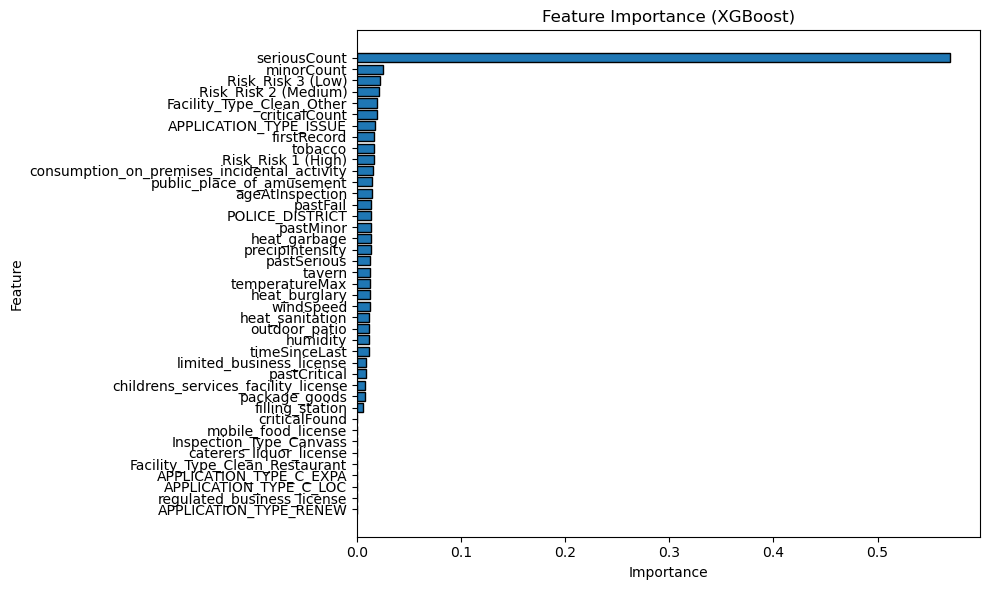

In [25]:
# Extract feature importance
feature_importance = best_xgb_model.feature_importances_

# Create a DataFrame for visualization
feature_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})

# Sort by importance
feature_df = feature_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_df['Feature'], feature_df['Importance'], edgecolor='black')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance (XGBoost)')
plt.gca().invert_yaxis()  # Reverse order for readability
plt.tight_layout()
plt.show()

### Prioritize Audits

**Hint**: Look up the [`.predict()`](https://www.kite.com/python/docs/sklearn.linear_model.SGDRegressor.predict), [`.predict_proba()`](https://www.kite.com/python/docs/sklearn.linear_model.LogisticRegression.predict_proba), and [`.sample()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html) methods. Then: 
1. Choose one of your models (or train a new simplified model or ensemble!) to predict outcomes and probabilities. 
2. Order your audits by their probability of detecting a "Fail" score
3. Plot your distribution of pass/fail among the first 1,000 observations in the dataset
4. Simulate random audits on the full chicago_2011_to_2013.csv dataset by picking 1,000 observations at random

In [26]:
# 1. Choose one of your models (or train a new simplified model or ensemble!) to predict outcomes and probabilities.

# Initialize and train the Logistic Regression model
logit_model = LogisticRegression(max_iter=1000, random_state=42)
logit_model.fit(X_train, y_train)

# Predict on test set to evaluate accuracy
y_pred = logit_model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")

Accuracy: 0.928


In [27]:
#
# 2. Order your audits by their probability of detecting a "Fail" score
# -----------
# Sort by the probabilities of whether it fails

y_prob = logit_model.predict_proba(X_test)[:, 1]  # Probability of "Fail" (class 1)

# Order audits by probability of "Fail" (higher probability of failure should be prioritized)
prob_df = pd.DataFrame({
    'Probability_Fail': y_prob,
    'Actual_Result': y_test.flatten()
})

# Sort the dataframe by probability of failing (descending order)
sorted_prob_df = prob_df.sort_values(by='Probability_Fail', ascending=False)

# Display top 10 audits based on probability of "Fail"
print(sorted_prob_df.head(10))

      Probability_Fail  Actual_Result
76            0.999999              1
1573          0.999999              1
19            0.999999              1
795           0.999998              1
476           0.999998              1
865           0.999998              1
2630          0.999997              1
2708          0.999973              1
333           0.999972              1
2925          0.999964              1


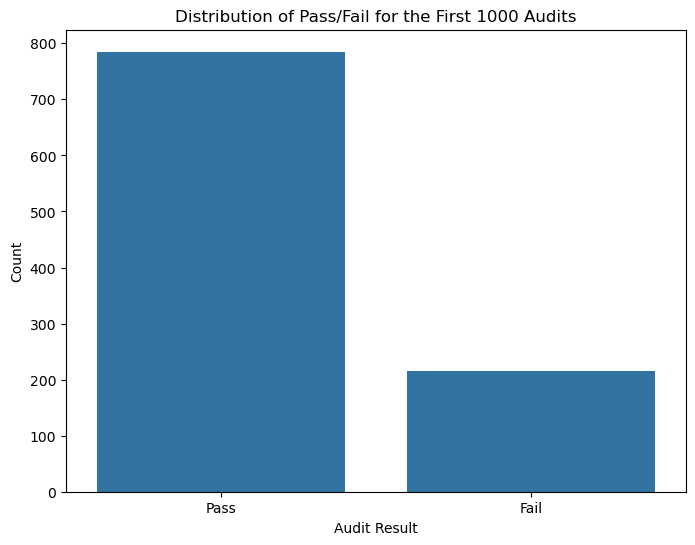

In [28]:
#
# 3. Plot your distribution of pass/fail among the first 1,000 observations in the dataset
# -----------

import matplotlib.pyplot as plt
import seaborn as sns

# First 1,000 observations in the sorted dataframe
first_1000 = prob_df.head(1000)

# Plot the distribution of Pass/Fail
plt.figure(figsize=(8, 6))
sns.countplot(x='Actual_Result', data=first_1000)
plt.title('Distribution of Pass/Fail for the First 1000 Audits')
plt.xlabel('Audit Result')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Pass', 'Fail'])
plt.show()

In [29]:
#
# 4. Simulate random audits on the full chicago_2011_to_2013.csv dataset by picking 1,000 observations at random
# -----------
import numpy as np

# Simulate 1,000 random audits (replace this with your actual dataset if needed)
#random_indices = np.random.choice(df.index, size=1000, replace=False)
#random_data = df.loc[random_indices]

#puy y back in to sample the same way as X
X_test['y'] = y_test
random_data = X_test.sample(1000)
y_random = random_data['y']

random_data = random_data.drop(columns=['y'])
X_test = X_test.drop(columns=['y'])

# Predict probabilities for the 1,000 random audits
random_probs = logit_model.predict_proba(random_data)[:, 1]  # Probability of "Fail"

# Create a DataFrame with results and probabilities
random_audits_df = pd.DataFrame({
    'Probability_Fail': random_probs,
    'Actual_Result': y_random
})

# Sort the simulated audits by probability of failing
sorted_random_audits = random_audits_df.sort_values(by='Probability_Fail', ascending=False)

# Display top 10 random audits (most likely to fail)
print("Sample of sorted random audits:")
print(sorted_random_audits.head(10))

print("Sample of unsorted random audits:")
print(random_audits_df.head(10))

Sample of sorted random audits:
                                        Probability_Fail  Actual_Result
Inspection_ID DBA_Name                                                 
1336114       COLLETTI'S RESTAURANT             0.999973              1
1335972       ROTHSCHILD LIQUORS                0.999972              1
1114929       BONIVINO'S INC                    0.999949              1
1138419       PIZZERIA DUE                      0.999949              1
1227535       GEORGIS CATERING                  0.999949              1
517678        EL PRESIDENTE RESTAURANT          0.999937              1
547712        SHOP RITE FOOD MART, INC          0.999929              1
596429        URU-SWATI                         0.999927              1
1188642       SCHOOL SNACKS                     0.999918              1
1227971       PETE'S MEAT & GROCERY#2           0.999906              1
Sample of unsorted random audits:
                                      Probability_Fail  Actual_Result


### Predict on 2014 inspection data

Use your favorite model to make predictions based on the features using the "Chicago Inspection 2014_updated.csv" file. Treat this as you would a test dataset. This means you will have to format the features (including removing some features and getting dummies) and the label (binarize and recode) in the same way you did the training data. (Remember the "Results" column is your label). You will then compare your predictions with the actual.

In [30]:
# data processing
# -----------
# drop column names related to geography, identification, and pass/fail flags that perfectly predict the outcome
chicago_inspections_2014.drop(columns = ['AKA_Name', 
                                         'License',
                                         'Address',
                                         'City',
                                         'State',
                                         'Zip',
                                         'Latitude',
                                         'Longitude',
                                         'Location',
                                         'ID',
                                         'LICENSE_ID',
                                         'LICENSE_TERM_START_DATE',
                                         'LICENSE_TERM_EXPIRATION_DATE',
                                         'LICENSE_STATUS',
                                         'ACCOUNT_NUMBER',
                                         'LEGAL_NAME',
                                         'DOING_BUSINESS_AS_NAME',
                                         'ADDRESS',
                                         'CITY',
                                         'STATE',
                                         'ZIP_CODE',
                                         'WARD',
                                         'PRECINCT',
                                         'LICENSE_CODE',
                                         'BUSINESS_ACTIVITY_ID',
                                         'BUSINESS_ACTIVITY',
                                         'LICENSE_NUMBER',
                                         'LATITUDE',
                                         'LONGITUDE'],
                                     inplace = True)

# set index
chicago_inspections_2014.set_index(['Inspection_ID', 'DBA_Name'], inplace = True)

In [31]:
# convert the inspection date to a datetime format
chicago_inspections_2014['Inspection_Date'] = pd.to_datetime(chicago_inspections_2014['Inspection_Date'])

In [32]:
# drop datetime info
# -----------
chicago_inspections_2014 = chicago_inspections_2014.dropna().drop(['Inspection_Date',
                                                                                   'minDate',
                                                                                   'maxDate'],
                                                                                  axis = 1)

In [33]:
# create feature dataset
X = chicago_inspections_2014.drop(columns = ['Results', 
                                                     'Facility_Type', 
                                                     'LICENSE_DESCRIPTION', 
                                                     'WARD_PRECINCT'])

# process target 
# -----------
y = chicago_inspections_2014['Results']


y = y.replace({'Pass w/ Conditions': 'Pass'})
lb_style = LabelBinarizer()
y = lb_style.fit_transform(y)

# recode 0s and 1s so 1s are "Fail"
y = np.where(y == 1, 0 ,1)

# get dummies
X = pd.get_dummies(X)

In [34]:
# predict and compare 
# -----------
rf_classifier.predict(X)

# Make predictions using the preprocessed feature dataset
y_pred = rf_classifier.predict(X)

In [37]:
# evaluate

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix

# Evaluate the model performance
accuracy = accuracy_score(y, y_pred)
recall = recall_score(y, y_pred)  # Recall focuses on identifying all failures
precision = precision_score(y, y_pred)
f1 = f1_score(y, y_pred)

# Print evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Recall: {recall:.2f}")
print(f"Precision: {precision:.2f}")
print(f"F1 Score: {f1:.2f}")

# Display a confusion matrix to understand predictions
cm = confusion_matrix(y, y_pred)
print("Confusion Matrix:")
print(cm)

Accuracy: 0.90
Recall: 0.87
Precision: 0.71
F1 Score: 0.78
Confusion Matrix:
[[2880  273]
 [ 105  679]]


## 5. Discussion Questions

1. Why do we need metrics beyond accuracy when using machine learning in the social sciences and public policy?


# Accuracy in machine learning alone is not enough for public policy and social sciences context since it doesn't account for the nuance of different errors. For example, if a model is not best with identifying unsafe establishments (false negatives), that could have far reaching consequences. Metrics like recall is best for minimizing false negatives. While the potential consequences of false positives (mistakenly flagging safe establishments) may not be as critical as false negatives, such errors would still be using resources therefore precision is great as flagging establishments that are genuinely risky. F1 score on the other hand, combines precision and recall to provide a balanced evaluation, could be useful in cases where both false negatives and false positives need consideration.

2. Imagine that establishments learned about the algorithm being used to determine who gets audited and they started adjusting their behavior (and changing certain key features about themselves that were important for the prediction) to avoid detection. How could policymakers address this interplay between algorithmic decisionmaking and real world behavior?

# Continuously updating and retraining the model using the latest data to capture new patterns of behavior. This prevents establishments from consistently gaming the system. Introduce random audits alongside predictive audits. This discourages establishments from solely optimizing for known algorithmic targets. Policymakers can also practice transparency but adjusting for accountability by releasing general audit criteria while keeping the exact algorithm confidential to prevent manipulation.